In [1]:
import numpy as np

In [2]:
import pandas as pd

#load csv file into a pandas dataframe
path="F:/Public charging infrastructure/"
df_mobility = pd.read_csv(path + 'Ladesaeulenregister.csv', encoding='CP850', sep=',',header=0,error_bad_lines=False)

# visualize first 5 rows
df_mobility.head()


,Betreiber,Stra▀e,Hausnummer,Postleitzahl,Ort,Bundesland,Breitengrad,Lõngengrad,Inbetriebnahmedatum,Anschlussleistung,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-W³rttemberg,48.442398,9.659075,1/11/2020,22,...,NaN,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,72589,Westerheim,Baden-W³rttemberg,48.510500,9.609000,1/7/2019,22,...,NaN,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EnBW mobility+ AG und Co.KG,Hauptstra▀e,91c,73340,Amstetten,Baden-W³rttemberg,48.578534,9.874840,3/19/2019,98,...,NaN,"DC Kupplung Combo, DC CHAdeMO",50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EnBW mobility+ AG und Co.KG,Karlstr.,45,89129,Langenau,Baden-W³rttemberg,48.500374,10.117366,12/21/2018,30,...,NaN,"AC Steckdose Typ 2, AC Schuko",22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EnBW mobility+ AG und Co.KG,Flurst³ck,313,89129,Langenau/Seligweiler,Baden-W³rttemberg,48.456817,10.029649,3/8/2019,300,...,NaN,DC Kupplung Combo,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28919 entries, 0 to 28918
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Betreiber               28919 non-null  object 
 1   Stra▀e                  28919 non-null  object 
 2   Hausnummer              28919 non-null  object 
 3   Postleitzahl            28919 non-null  int64  
 4   Ort                     28919 non-null  object 
 5   Bundesland              28919 non-null  object 
 6   Breitengrad             28919 non-null  float64
 7   Lõngengrad              28919 non-null  float64
 8   Inbetriebnahmedatum     28919 non-null  object 
 9   Anschlussleistung       28919 non-null  object 
 10  Art der Ladeeinrichung  28919 non-null  object 
 11  Anzahl Ladepunkte       28919 non-null  int64  
 12  Steckertypen1           28918 non-null  object 
 13  P1 [kW]                 28919 non-null  float64
 14  Public Key1             2341 non-null 

In [4]:
# translate columns into english 
old_names = df_mobility.columns.tolist()
new_names = ['operator', 'street','house_number','postcode','city','federal_state','latitude_[dg]', 'longitude_[dg]', 'commissioning_date',
            'power_connection_[kw]', 'type_of_charger', 'number_of_charging_points','type_of_plug_1', 'p1_[kw]', 
             'public_key1', 'type_of_plug_2', 'p2_[kw]', 'public_key2', 'type_of_plug_3', 'p3_[kw]', 'public_key3',
             'type_of_plug_4', 'p4_[kw]', 'public_key4']

df_mobility.rename(columns=dict(zip(old_names, new_names)), inplace=True)

# check the translation visualizing the first 2 rows
df_mobility.head(5)

,operator,street,house_number,postcode,city,federal_state,latitude_[dg],longitude_[dg],commissioning_date,power_connection_[kw],...,public_key1,type_of_plug_2,p2_[kw],public_key2,type_of_plug_3,p3_[kw],public_key3,type_of_plug_4,p4_[kw],public_key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-W³rttemberg,48.442398,9.659075,1/11/2020,22,...,NaN,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,72589,Westerheim,Baden-W³rttemberg,48.510500,9.609000,1/7/2019,22,...,NaN,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EnBW mobility+ AG und Co.KG,Hauptstra▀e,91c,73340,Amstetten,Baden-W³rttemberg,48.578534,9.874840,3/19/2019,98,...,NaN,"DC Kupplung Combo, DC CHAdeMO",50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EnBW mobility+ AG und Co.KG,Karlstr.,45,89129,Langenau,Baden-W³rttemberg,48.500374,10.117366,12/21/2018,30,...,NaN,"AC Steckdose Typ 2, AC Schuko",22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EnBW mobility+ AG und Co.KG,Flurst³ck,313,89129,Langenau/Seligweiler,Baden-W³rttemberg,48.456817,10.029649,3/8/2019,300,...,NaN,DC Kupplung Combo,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
old_names

['Betreiber',
 'Stra▀e',
 'Hausnummer',
 'Postleitzahl',
 'Ort',
 'Bundesland',
 'Breitengrad',
 'Lõngengrad',
 'Inbetriebnahmedatum',
 'Anschlussleistung',
 'Art der Ladeeinrichung',
 'Anzahl Ladepunkte',
 'Steckertypen1',
 'P1 [kW]',
 'Public Key1',
 'Steckertypen2',
 'P2 [kW]',
 'Public Key2',
 'Steckertypen3',
 'P3 [kW]',
 'Public Key3',
 'Steckertypen4',
 'P4 [kW]',
 'Public Key4']

In [6]:
# unique elements of the column type_of_charger
df_mobility.type_of_charger.unique()
# array(['Schnellladeeinrichtung', 'Normalladeeinrichtung'], dtype=object)

# modify entries of the column type_of_charger
df_mobility.type_of_charger.replace({'Schnellladeeinrichtung': 'fast', 'Normalladeeinrichtung': 'normal'}, inplace=True)


In [7]:
df_mobility.type_of_charger

0        normal
1        normal
2          fast
3        normal
4          fast
          ...  
28914    normal
28915    normal
28916      fast
28917    normal
28918    normal
Name: type_of_charger, Length: 28919, dtype: object

In [8]:
# basic summary of the data frame
df_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28919 entries, 0 to 28918
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   operator                   28919 non-null  object 
 1   street                     28919 non-null  object 
 2   house_number               28919 non-null  object 
 3   postcode                   28919 non-null  int64  
 4   city                       28919 non-null  object 
 5   federal_state              28919 non-null  object 
 6   latitude_[dg]              28919 non-null  float64
 7   longitude_[dg]             28919 non-null  float64
 8   commissioning_date         28919 non-null  object 
 9   power_connection_[kw]      28919 non-null  object 
 10  type_of_charger            28919 non-null  object 
 11  number_of_charging_points  28919 non-null  int64  
 12  type_of_plug_1             28918 non-null  object 
 13  p1_[kw]                    28919 non-null  flo

In [9]:
# replace null values by 0
columns_na = ['type_of_plug_1','type_of_plug_2', 'p2_[kw]', 'type_of_plug_3', 'p3_[kw]', 'type_of_plug_4', 'p4_[kw]']
for column in columns_na:
    df_mobility[column] = df_mobility[column].fillna(0)

In [10]:
df_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28919 entries, 0 to 28918
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   operator                   28919 non-null  object 
 1   street                     28919 non-null  object 
 2   house_number               28919 non-null  object 
 3   postcode                   28919 non-null  int64  
 4   city                       28919 non-null  object 
 5   federal_state              28919 non-null  object 
 6   latitude_[dg]              28919 non-null  float64
 7   longitude_[dg]             28919 non-null  float64
 8   commissioning_date         28919 non-null  object 
 9   power_connection_[kw]      28919 non-null  object 
 10  type_of_charger            28919 non-null  object 
 11  number_of_charging_points  28919 non-null  int64  
 12  type_of_plug_1             28919 non-null  object 
 13  p1_[kw]                    28919 non-null  flo

In [11]:
# drop public key columns
df_mobility.drop(columns=['public_key1', 'public_key2', 'public_key3', 'public_key4'], inplace=True)

In [12]:
df_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28919 entries, 0 to 28918
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   operator                   28919 non-null  object 
 1   street                     28919 non-null  object 
 2   house_number               28919 non-null  object 
 3   postcode                   28919 non-null  int64  
 4   city                       28919 non-null  object 
 5   federal_state              28919 non-null  object 
 6   latitude_[dg]              28919 non-null  float64
 7   longitude_[dg]             28919 non-null  float64
 8   commissioning_date         28919 non-null  object 
 9   power_connection_[kw]      28919 non-null  object 
 10  type_of_charger            28919 non-null  object 
 11  number_of_charging_points  28919 non-null  int64  
 12  type_of_plug_1             28919 non-null  object 
 13  p1_[kw]                    28919 non-null  flo

In [13]:
# check if there are null values
df_mobility.isnull().sum().sum()
# 0

0

In [14]:
# check the data types of the columns
df_mobility.dtypes

operator                      object
street                        object
house_number                  object
postcode                       int64
city                          object
federal_state                 object
latitude_[dg]                float64
longitude_[dg]               float64
commissioning_date            object
power_connection_[kw]         object
type_of_charger               object
number_of_charging_points      int64
type_of_plug_1                object
p1_[kw]                      float64
type_of_plug_2                object
p2_[kw]                      float64
type_of_plug_3                object
p3_[kw]                      float64
type_of_plug_4                object
p4_[kw]                       object
dtype: object

In [15]:
df_mobility[['p2_[kw]', 'p3_[kw]', 'p4_[kw]']].dtypes

p2_[kw]    float64
p3_[kw]    float64
p4_[kw]     object
dtype: object

In [16]:
df_mobility[['p2_[kw]', 'p3_[kw]', 'p4_[kw]']]

,p2_[kw],p3_[kw],p4_[kw]
0,22.0,0.0,0
1,22.0,0.0,0
2,50.0,0.0,0
3,22.0,0.0,0
4,300.0,0.0,0
...,...,...,...
28914,22.0,0.0,0
28915,22.0,0.0,0
28916,0.0,0.0,0
28917,22.0,0.0,0


In [22]:
df_mobility['p4_[kw]'].iloc[13380] = 0

C:\Users\admi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
# convert the data type of these columns to float
df_mobility['p4_[kw]']=df_mobility['p4_[kw]'].replace('',np.nan).astype(float)

In [24]:
df_mobility[['p2_[kw]', 'p3_[kw]', 'p4_[kw]']].dtypes

p2_[kw]    float64
p3_[kw]    float64
p4_[kw]    float64
dtype: object

In [25]:
df_mobility[['p2_[kw]', 'p3_[kw]', 'p4_[kw]']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28919 entries, 0 to 28918
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   p2_[kw]  28919 non-null  float64
 1   p3_[kw]  28919 non-null  float64
 2   p4_[kw]  28919 non-null  float64
dtypes: float64(3)
memory usage: 677.9 KB


In [26]:
#convert the column commissioning_date to datetime
df_mobility['commissioning_date'] = pd.to_datetime(df_mobility['commissioning_date'], format='%m/%d/%Y')

In [27]:
# check that inappropriate data types and null values were correctly modified
df_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28919 entries, 0 to 28918
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   operator                   28919 non-null  object        
 1   street                     28919 non-null  object        
 2   house_number               28919 non-null  object        
 3   postcode                   28919 non-null  int64         
 4   city                       28919 non-null  object        
 5   federal_state              28919 non-null  object        
 6   latitude_[dg]              28919 non-null  float64       
 7   longitude_[dg]             28919 non-null  float64       
 8   commissioning_date         28919 non-null  datetime64[ns]
 9   power_connection_[kw]      28919 non-null  object        
 10  type_of_charger            28919 non-null  object        
 11  number_of_charging_points  28919 non-null  int64         
 12  type

In [28]:
#combining street and nouse number columns to address column
df_mobility["address"] = df_mobility["street"] + df_mobility["house_number"]

# drop the column postcode_city
df_mobility.drop(['street','house_number'], axis=1, inplace=True)

# check column names
df_mobility.columns.tolist()
# ['operator', 'address', 'federal_state', 'longitude_[dg]', 'latitude_[dg]', 'commissioning_date', 'power_connection_[kw]',
#  'type_of_charger','number_of_charging_points', 'type_of_plug_1', 'p1_[kw]', 'type_of_plug_2', 'p2_[kw]', 'type_of_plug_3',
#  'p3_[kw]', 'type_of_plug_4', 'p4_[kw]', 'postcode', 'city']

['operator',
 'postcode',
 'city',
 'federal_state',
 'latitude_[dg]',
 'longitude_[dg]',
 'commissioning_date',
 'power_connection_[kw]',
 'type_of_charger',
 'number_of_charging_points',
 'type_of_plug_1',
 'p1_[kw]',
 'type_of_plug_2',
 'p2_[kw]',
 'type_of_plug_3',
 'p3_[kw]',
 'type_of_plug_4',
 'p4_[kw]',
 'address']

In [29]:
# there are city names with leading or trailing spaces
df_mobility.city[df_mobility.city.str.startswith(' ') | df_mobility.city.str.endswith(' ')].unique()

array(['Berg / Neumarkt ', ' Maintal-D÷rningheim', ' Eschborn',
       'Hannover ', 'M³nster '], dtype=object)

In [30]:
# names of columns of type object
columns_object = df_mobility.select_dtypes(include='object').columns

# remove leading and trailing spaces of columns of type object using the string method strip
for column in columns_object:
    df_mobility[column] = df_mobility[column].str.strip()

# check that leading and trailing spaces of the column city were correctly removed
(df_mobility.city.str.startswith(' ') | df_mobility.city.str.endswith(' ')).any()

False

In [31]:
# series containing city names
cities = df_mobility.city

# discover wrong city names using the contains method
cities[cities.str.contains('Frankfurt')].unique()
# array(['Frankfurt (Oder)', 'Frankfurt/Oder', 'Frankfurt',
#        'Frankfurt am Main', 'Frankfurt-Niederrad'], dtype=object)

cities[cities.str.contains('Stuttgart')].unique()
# array(['Stuttgart', 'Stuttgart-Obertürkheim', 'Stuttgart-Mühlhausen',
#        'Stuttgart-Möhringen'], dtype=object)

array(['Stuttgart', 'Stuttgart-Mitte', 'Stuttgart-Obert³rkheim',
       'Stuttgart-M³hlhausen', 'Stuttgart-Feuerbach',
       'Stuttgart-M÷hringen'], dtype=object)

In [32]:
# map wrong names to correct denominations
cities_modification = {'Hamburg-Wandsbeck': 'Hamburg', 'Hamburg-Duvenstedt': 'Hamburg', 'Berlin-Köpenick': 'Berlin',
                       'Berlin-Friedrichsfelde': 'Berlin', 'Berlin-Reinickendorf': 'Berlin', 'Köln-Niehl': 'Köln',
                       'Köln-Merheim': 'Köln', 'Frankfurt': 'Frankfurt am Main', 'Frankfurt-Niederrad': 'Frankfurt am Main',
                       'Stuttgart-Obertürkheim': 'Stuttgart', 'Stuttgart-Mühlhausen': 'Stuttgart', 'Stuttgart-Möhringen': 'Stuttgart',
                       'Leipzig-Gohlis': 'Leipzig', 'Essen-Kettwig': 'Essen', 'Bremen-Vahr': 'Bremen', 'Dresden Gabitz': 'Dresden',
                       'Dresden Striesen': 'Dresden', 'Regensburg-Schwabelweis': 'Regensburg', 'Wuppertal Vohwinkel': 'Wuppertal',
                       'Stuttgart-Mitte': 'Stuttgart', 'Stuttgart-Obert³rkheim': 'Stuttgart','Stuttgart-M³hlhausen': 'Stuttgart', 
                       'Stuttgart-Feuerbach': 'Stuttgart','Stuttgart-M÷hringen': 'Stuttgart'}
# replace wrong values
df_mobility.city.replace(cities_modification, inplace=True)

# check that the modification was carried out correctly
cities[cities.str.contains('Stuttgart')].unique()
# array(['Stuttgart'], dtype=object)

array(['Stuttgart'], dtype=object)

In [33]:
# number of duplicated rows
df_mobility.duplicated().sum()

3779

### These duplicated observations should not be removed since they represent several charging stations located at the same point.

In [34]:
df_mobility.head()

,operator,postcode,city,federal_state,latitude_[dg],longitude_[dg],commissioning_date,power_connection_[kw],type_of_charger,number_of_charging_points,type_of_plug_1,p1_[kw],type_of_plug_2,p2_[kw],type_of_plug_3,p3_[kw],type_of_plug_4,p4_[kw],address
0,Albwerk GmbH & Co. KG,72535,Heroldstatt,Baden-W³rttemberg,48.442398,9.659075,2020-01-11,22,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Ennabeurer Weg0
1,Albwerk GmbH & Co. KG,72589,Westerheim,Baden-W³rttemberg,48.510500,9.609000,2019-01-07,22,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Parkplatz Campingplatz0
2,EnBW mobility+ AG und Co.KG,73340,Amstetten,Baden-W³rttemberg,48.578534,9.874840,2019-03-19,98,fast,2,AC Kupplung Typ 2,43.0,"DC Kupplung Combo, DC CHAdeMO",50.0,NaN,0.0,NaN,0.0,Hauptstra▀e91c
3,EnBW mobility+ AG und Co.KG,89129,Langenau,Baden-W³rttemberg,48.500374,10.117366,2018-12-21,30,normal,2,"AC Steckdose Typ 2, AC Schuko",22.0,"AC Steckdose Typ 2, AC Schuko",22.0,NaN,0.0,NaN,0.0,Karlstr.45
4,EnBW mobility+ AG und Co.KG,89129,Langenau/Seligweiler,Baden-W³rttemberg,48.456817,10.029649,2019-03-08,300,fast,2,DC Kupplung Combo,300.0,DC Kupplung Combo,300.0,NaN,0.0,NaN,0.0,Flurst³ck313


In [35]:
df_mobility[df_mobility['city'].str.startswith('K') & df_mobility['city'].str.endswith('ln')]

,operator,postcode,city,federal_state,latitude_[dg],longitude_[dg],commissioning_date,power_connection_[kw],type_of_charger,number_of_charging_points,type_of_plug_1,p1_[kw],type_of_plug_2,p2_[kw],type_of_plug_3,p3_[kw],type_of_plug_4,p4_[kw],address
18958,Gemeinde Kirchlinteln,27308,Kirchlinteln,Niedersachsen,52.940460,9.325010,2021-03-22,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Am Rathaus1
18959,Ladesonne GmbH & Co. KG,27308,Kirchlinteln,Niedersachsen,52.844003,9.346383,2021-08-01,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Steinfeld9
23539,LANXESS Deutschland GmbH,50569,K÷ln,Nordrhein-Westfalen,50.937417,6.970690,2021-07-22,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Kennedyplatz1
23540,LANXESS Deutschland GmbH,50569,K÷ln,Nordrhein-Westfalen,50.937417,6.970690,2021-07-22,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Kennedyplatz1
23541,LANXESS Deutschland GmbH,50569,K÷ln,Nordrhein-Westfalen,50.937417,6.970690,2021-07-22,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Kennedyplatz1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23848,Mercedes-Benz AG,51149,K÷ln,Nordrhein-Westfalen,50.906110,7.063135,2019-12-01,22,normal,2,AC Steckdose Typ 2,11.0,AC Steckdose Typ 2,11.0,NaN,0.0,NaN,0.0,Maarhõuser Weg1
23853,Mercedes-Benz AG,51749,K÷ln,Nordrhein-Westfalen,50.906735,7.061123,2019-12-01,22,normal,2,AC Steckdose Typ 2,11.0,AC Steckdose Typ 2,11.0,NaN,0.0,NaN,0.0,Maarhõuserweg1
27888,Charge-ON GmbH,24376,Kappeln,Schleswig-Holstein,54.668670,9.918510,2018-09-27,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Mehlbydiek23
27889,Nicolaus Schmidt GmbH & Co. KG,24376,Kappeln,Schleswig-Holstein,54.659258,9.926121,2021-02-21,39.6,normal,2,DC Kupplung Combo,22.0,AC Steckdose Typ 2,11.0,NaN,0.0,NaN,0.0,Hospitalstra▀e1


In [36]:
df_mobility['city'].unique()

array(['Heroldstatt', 'Westerheim', 'Amstetten', ..., 'Apolda',
       'Gro▀heringen', 'Bad Sulza'], dtype=object)

In [37]:
df_mobility['city']= df_mobility['city'].str.replace('³','ü')
df_mobility['city']= df_mobility['city'].str.replace('▀','ß')
df_mobility['city']= df_mobility['city'].str.replace('÷','ö')

In [38]:
df_mobility['federal_state'].unique()

array(['Baden-W³rttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Th³ringen'], dtype=object)

In [39]:
df_mobility['federal_state']= df_mobility['federal_state'].str.replace('³','ü')

In [40]:
df_mobility['federal_state'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

## Number of charging stations by federal state

Text(0, 0.5, 'Number')

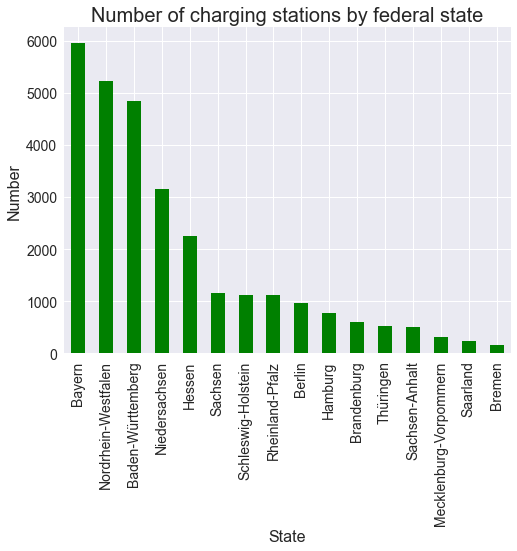

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

# number of charging station per federal state
df_mobility.federal_state.value_counts().plot(kind='bar', color='green', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of charging stations by federal state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

## Which cities have the most EV charging station in Germany?

Text(0, 0.5, 'Number')

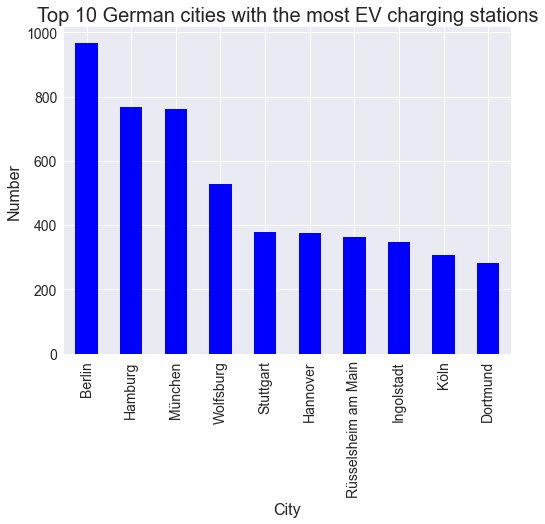

In [42]:
# top 10 German cities with the most EV charging stations
df_mobility.city.value_counts().head(10).plot(kind='bar', color='blue', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging stations', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number', fontsize=16)

In [43]:
# number of charging stations located in Munich, Hamburg, or Berlin
top_three = df_mobility.city.isin(['München', 'Hamburg', 'Berlin']).sum()

# number of charging stations in Germany
total = df_mobility.shape[0]

# percentage of charging stations located in Munich, Hamburg, or Berlin
top_three/total*100

8.627545904076904

## Which cities have the most EV charging points in Germany?

Text(0, 0.5, '')

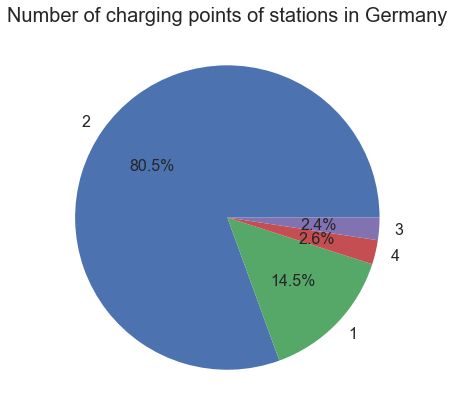

In [44]:
# number of charging points of stations in Germany - pie chart
df_mobility['number_of_charging_points'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', fontsize=16)

# labels and title
plt.title('Number of charging points of stations in Germany', fontsize=20)
plt.ylabel('')

Text(0, 0.5, 'Number')

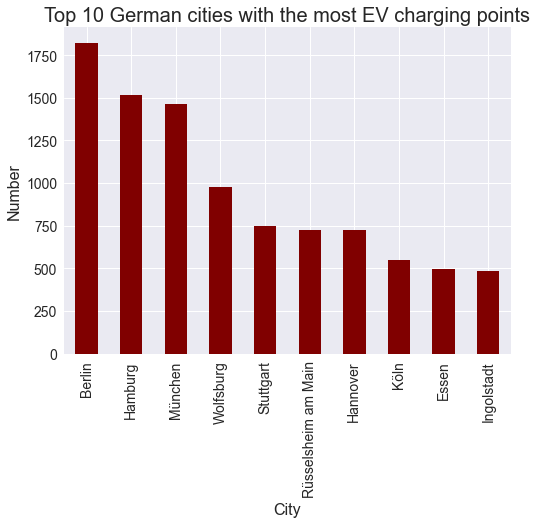

In [45]:
# top 10 German cities with the most EV charging points
df_mobility.groupby('city').sum().number_of_charging_points.sort_values(ascending=False).head(10).plot(kind='bar', color='maroon', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging points',fontsize=20)
plt.xlabel('City',fontsize=16)
plt.ylabel('Number',fontsize=16)

Text(0, 0.5, 'Number')

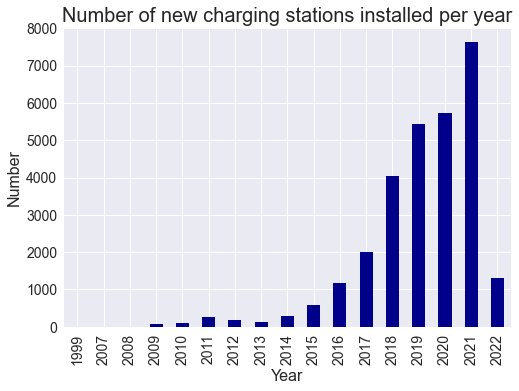

In [46]:
# number of new charging stations installed per year
df_mobility['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='darkblue')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of new charging stations installed per year',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number',fontsize=16)

## Power of the charging points in Germany

### Charging Time [h] = Battery Capacity [kwh] / Charging Power [kw]

In [47]:
p1, p2, p3, p4 = df_mobility['p1_[kw]'], df_mobility['p2_[kw]'], df_mobility['p3_[kw]'], df_mobility['p4_[kw]']

# serie that contains the power of all charging points in Germany
charging_points = pd.concat([p1, p2, p3, p4])

# remove entries equal to 0 
charging_points = charging_points[charging_points != 0]

# 10 most common power
most_common_power = charging_points.value_counts().head(10)

most_common_power

22.0     39506
11.0      7790
50.0      2003
150.0     1473
300.0     1282
43.0      1070
3.7        539
350.0      472
75.0       342
20.0       204
dtype: int64

In [48]:
import numpy as np

# number of unique power outputs in Germany
charging_points.nunique()
# 62

# unique power outputs sorted in ascending order 
np.sort(charging_points.unique())

array([  2.  ,   2.3 ,   3.  ,   3.5 ,   3.6 ,   3.7 ,   4.14,   4.6 ,
         4.7 ,   5.  ,   5.5 ,   5.83,   6.  ,   6.4 ,   7.  ,   7.1 ,
         7.2 ,   7.4 ,   7.5 ,   8.  ,   8.3 ,  10.  ,  11.  ,  11.4 ,
        12.  ,  15.  ,  16.  ,  16.5 ,  17.  ,  17.25,  19.  ,  20.  ,
        21.  ,  21.75,  22.  ,  22.1 ,  22.2 ,  23.  ,  24.  ,  25.  ,
        27.  ,  30.  ,  32.  ,  35.  ,  36.  ,  37.5 ,  38.  ,  39.  ,
        40.  ,  42.  ,  43.  ,  44.  ,  45.  ,  50.  ,  55.  ,  60.  ,
        62.  ,  62.5 ,  65.  ,  70.  ,  72.  ,  75.  ,  76.5 ,  78.  ,
        80.  ,  90.  ,  98.  ,  99.  , 100.  , 112.5 , 120.  , 125.  ,
       130.  , 135.  , 140.  , 144.  , 150.  , 160.  , 163.  , 175.  ,
       180.  , 200.  , 225.  , 240.  , 250.  , 280.  , 300.  , 320.  ,
       350.  ])

Text(0, 0.5, '')

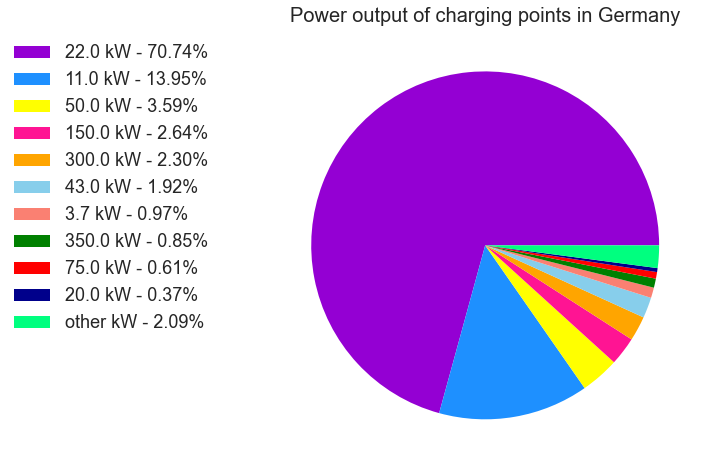

In [49]:
# number of charging points with a power output different from 22, 11, 50, 43, 3.7, 350, 150, 42, 20, 53 (10 most common power outputs)
num_charging_points = charging_points.count()
other_power = num_charging_points - most_common_power.sum()

# include other in the most common power output serie
most_common_power.at['other'] = other_power

# define colors of the pie plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# pie plot showing power output of charging points in Germany
most_common_power.plot(kind='pie', figsize=(8, 8), labels=None, colors=colors, fontsize=16)

# legend  - percentage of charging points 
labels = ['{} kW - {:.2%}'.format(index, most_common_power.loc[index]/num_charging_points) for index in most_common_power.index]
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=18)

# labels and title
plt.title('Power output of charging points in Germany', fontsize=20)
plt.ylabel('')

## Where are ultra-rapid chargers (>300 kW) located? When were they installed?

In [50]:
# number of charging points of 300 kW in operation
(charging_points == 300.0).sum()

1282

In [51]:
# number of charging points of 320 kW in operation 
(charging_points == 320.0).sum()

49

In [52]:
# number of charging points of 350 kW in operation 
(charging_points == 350.0).sum()

472

In [53]:
# charging stations with at least one ultra-rapid charging point (>300kW)
ultra_fast_stations = df_mobility[(df_mobility['p1_[kw]']>=300.0) | (df_mobility['p2_[kw]']>=300.0) | (df_mobility['p3_[kw]']>=300.0) | (df_mobility['p4_[kw]']>=300.0)]

# number of charging stations with at least one ultra-rapid charging point
len(ultra_fast_stations)

1163

Text(0, 0.5, 'Number')

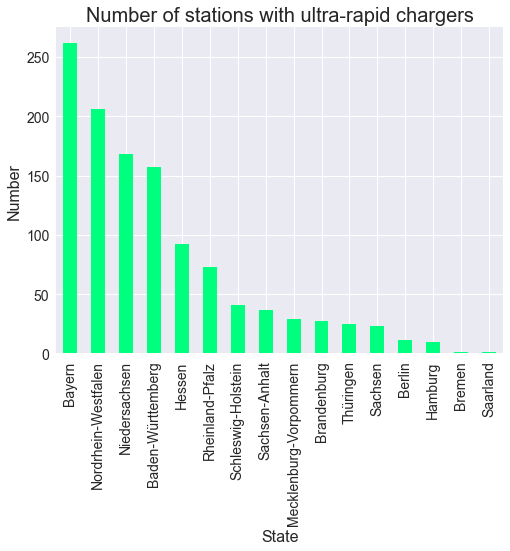

In [54]:
# number of charging station with ultra-rapid charger
ultra_fast_stations.federal_state.value_counts().plot(kind='bar', color='springgreen', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

Text(0, 0.5, 'Number')

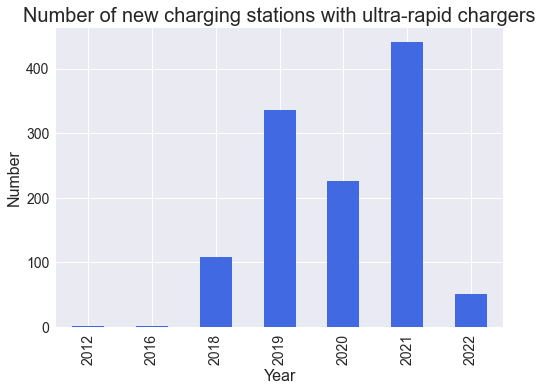

In [55]:
# number of new charging stations with ultra-rapid chargers
ultra_fast_stations['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='royalblue')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of new charging stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)

In [56]:
# first electric vehicle charging station in Germany
df_mobility['commissioning_date'].min()

Timestamp('1999-12-31 00:00:00')

In [57]:
# first charging station with an ultra-rapid charging point (>300kW) in Germany.
ultra_fast_stations['commissioning_date'].min()

Timestamp('2012-06-16 00:00:00')

In [58]:
# the most populated cities in Germany
biggest_cities = ['Berlin', 'Hamburg', 'München', 'Köln', 'Frankfurt am Main', 'Stuttgart', 'Düsseldorf', 'Dortmund', 'Essen', 'Leipzig']

# group by date and city
date_city_group_by = df_mobility.groupby([df_mobility['commissioning_date'].dt.year, 'city']).count()

# select a column and move the innermost level of the index to the columns
date_cities = date_city_group_by.operator.unstack()

# select the most populated cities in germany
date_cities_10 = date_cities[biggest_cities]

date_cities_10

city,Berlin,Hamburg,München,Köln,Frankfurt am Main,Stuttgart,Düsseldorf,Dortmund,Essen,Leipzig
commissioning_date,,,,,,,,,,
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,25.0,NaN,NaN,1.0,4.0,NaN,1.0,10.0,13.0,NaN
2010,14.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,NaN
2011,25.0,NaN,1.0,3.0,1.0,NaN,8.0,21.0,13.0,1.0
2012,24.0,NaN,NaN,NaN,NaN,NaN,1.0,12.0,NaN,NaN
2013,NaN,NaN,NaN,8.0,NaN,NaN,1.0,8.0,1.0,3.0
2014,5.0,2.0,NaN,13.0,2.0,NaN,10.0,NaN,1.0,4.0


Text(0, 0.5, 'Number')

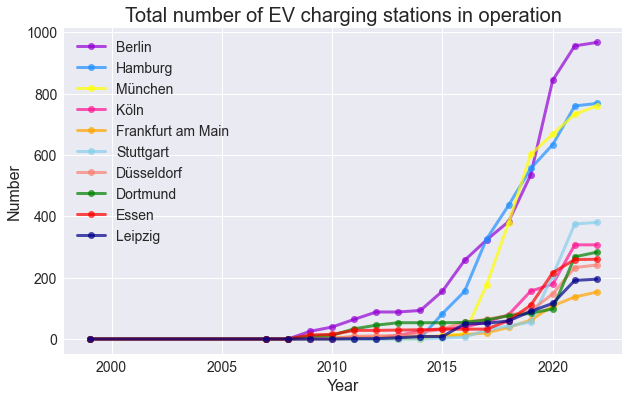

In [59]:
# define the colors for the line plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# line plot showing the total number of EV charging station in operation over the years
date_cities_10.fillna(0.0).cumsum().plot(color=colors, marker='o', alpha=0.7, linewidth=3, figsize=(10,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# define the title and the labels
plt.title('Total number of EV charging stations in operation', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

In [ ]:
pip install folium

In [60]:
import folium

In [63]:
df_mobility[df_mobility['city']=='Berlin']

,operator,postcode,city,federal_state,latitude_[dg],longitude_[dg],commissioning_date,power_connection_[kw],type_of_charger,number_of_charging_points,type_of_plug_1,p1_[kw],type_of_plug_2,p2_[kw],type_of_plug_3,p3_[kw],type_of_plug_4,p4_[kw],address
5610,SWM Versorgungs GmbH,12277,Berlin,Bayern,48.137234,11.534334,2021-04-22,50,fast,2,"DC Kupplung Combo, DC CHAdeMO",50.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Gollierstr.70
10802,innogy eMobility Solutions GmbH,10115,Berlin,Berlin,52.535955,13.368842,2009-07-14,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Boyenstr.23
10803,innogy eMobility Solutions GmbH,10115,Berlin,Berlin,52.534398,13.395824,2009-07-14,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Anklamer Str.8
10804,innogy eMobility Solutions GmbH,10115,Berlin,Berlin,52.529125,13.395841,2010-04-14,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Torstra▀e165
10805,innogy eMobility Solutions GmbH,10115,Berlin,Berlin,52.530483,13.391350,2010-04-14,44,normal,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,0.0,NaN,0.0,Gartenstra▀e13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11770,Allego GmbH,14199,Berlin,Berlin,52.476902,13.287843,2020-10-26,22,normal,2,AC Steckdose Typ 2,11.0,AC Steckdose Typ 2,11.0,NaN,0.0,NaN,0.0,Berkaer Str.40
11771,Allego GmbH,14199,Berlin,Berlin,52.479241,13.308733,2020-10-26,22,normal,2,AC Steckdose Typ 2,11.0,AC Steckdose Typ 2,11.0,NaN,0.0,NaN,0.0,Forckenbeckstr.96
11772,Allego GmbH,14199,Berlin,Berlin,52.479021,13.292588,2020-10-26,22,normal,2,AC Steckdose Typ 2,11.0,AC Steckdose Typ 2,11.0,NaN,0.0,NaN,0.0,Kissinger Str.16
11773,Kaufland Dienstleistung GmbH & Co. KG,14597,Berlin,Berlin,52.529900,13.213127,2020-04-23,92,fast,3,"AC Steckdose Typ 2, AC Kupplung Typ 2",22.0,"AC Steckdose Typ 2, DC Kupplung Combo",50.0,"AC Steckdose Typ 2, AC Kupplung Typ 2, DC CHAdeMO",50.0,NaN,0.0,Pichelswerderstr.6


In [65]:
# define a map centered around Berlin
Berlin_map = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# display the map
Berlin_map

In [66]:
# data frame containing only the charging stations located in Berlin
df_berlin = df_mobility[df_mobility['city'] == 'Berlin']

# create a map object of the city of Berlin
berlin_map_markers = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# display charging stations using circle markers
for lat, lng in zip(df_berlin['latitude_[dg]'], df_berlin['longitude_[dg]']):
    folium.CircleMarker(
            [lat, lng],
            radius=4,
            color='purple',
            opacity=0.4,
            fill=True,
            fill_color='blue').add_to(berlin_map_markers)
    
berlin_map_markers

In [67]:
# number of charging points of stations in Berlin - percentage
df_berlin.number_of_charging_points.value_counts(normalize=True)*100

2    78.076525
1    17.373320
3     3.309204
4     1.240951
Name: number_of_charging_points, dtype: float64

In [68]:
# create a map object of the city of Berlin
berlin_map_markers_2 = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# define colors for the markers
colors = ['red', 'purple', 'orange', 'blue']

# display charging stations using circle markers
for lat, lng, number in zip(df_berlin['latitude_[dg]'], df_berlin['longitude_[dg]'], df_berlin['number_of_charging_points']):
    folium.CircleMarker(
            [lat, lng],
            radius=number*2,
            color=colors[number-1],
            opacity=0.5,
            fill=True,
            fill_color='blue').add_to(berlin_map_markers_2)
    
berlin_map_markers_2

In [70]:
# type of chargers - normal or fast
df_mobility.type_of_charger.unique()

array(['normal', 'fast'], dtype=object)

In [69]:
# a charging station is considered fast if contains at least 1 charging point with a power output larger than 22kw
df_mobility[df_mobility.type_of_charger == 'fast'][['p1_[kw]', 'p2_[kw]', 'p3_[kw]', 'p4_[kw]']].max(axis=1).unique()

array([ 50. , 300. , 150. , 100. ,  62.5, 320. , 180. , 225. ,  75. ,
       125. , 350. ,  24. , 175. , 160. ,  44. ,  60. ,  43. ,  45. ,
        25. ,  55. , 120. ,  36. , 250. ,  62. ,  23. ,  30. , 135. ,
        78. ,  80. , 200. ,  32. ,  70. ,  65. ,  35. , 140. , 144. ,
        90. , 163. ,  22.2, 130. , 112.5,  72. ,  39. ,  27. , 280. ,
        40. ,  99. ,  98. ,  76.5,  22.1])

In [71]:
# number of charging stations with at least one charging point with a power output >22kw
len(df_berlin[df_berlin.type_of_charger == 'fast'])

86